In [1]:
# http://matthiaseisen.com/articles/graphviz/
# we'd really like to make a nicer version of our case recruitment, case control, and flowchart pics

import graphviz as gv
import functools
from IPython.display import SVG

In [2]:
graph = functools.partial(gv.Graph, format='svg')
digraph = functools.partial(gv.Digraph, format='svg')

def add_nodes(graph, nodes):
    for n in nodes:
        if isinstance(n, tuple):
            graph.node(n[0], **n[1])
        else:
            graph.node(n)
    return graph

def add_edges(graph, edges):
    for e in edges:
        if isinstance(e[0], tuple):
            graph.edge(*e[0], **e[1])
        else:
            graph.edge(*e)
    return graph

def apply_styles(graph, styles):
    graph.graph_attr.update(
        ('graph' in styles and styles['graph']) or {}
    )
    graph.node_attr.update(
        ('nodes' in styles and styles['nodes']) or {}
    )
    graph.edge_attr.update(
        ('edges' in styles and styles['edges']) or {}
    )
    return graph

In [3]:
styles = {
    'graph': {
        'label': 'Case recruitment',
        'fontsize': '14',
        'fontcolor': 'black',
        'bgcolor': 'white',
        'rankdir': 'TB',
    },
    'nodes': {
        'fontname': 'Helvetica',
        'shape': 'square',
        'fontcolor': 'black',
        'color': 'black',
        'style': '',
        'fillcolor': '',
    },
    'edges': {
        'style': '',
        'color': 'black',
        'arrowhead': 'open',
        'fontname': 'Courier',
        'fontsize': '12',
        'fontcolor': 'black',
    }
}

styles2 = {
    'graph': {
        'label': '',
        'fontsize': '14',
        'fontcolor': 'black',
        'bgcolor': 'white',
        'rank': 'same',
    },
    'nodes': {
        'fontname': 'Helvetica',
        'shape': 'square',
        'fontcolor': 'black',
        'color': 'black',
        'style': '',
        'fillcolor': '',
        
    },
    'edges': {
        'style': '',
        'color': 'black',
        'arrowhead': 'open',
        'fontname': 'Courier',
        'fontsize': '12',
        'fontcolor': 'black',
    }
}

styles3 = {
    'graph': {
        'label': 'Control recruitment',
        'fontsize': '14',
        'fontcolor': 'black',
        'bgcolor': 'white',
        'rankdir': 'TB',
    },
    'nodes': {
        'fontname': 'Helvetica',
        'shape': 'square',
        'fontcolor': 'black',
        'color': 'black',
        'style': '',
        'fillcolor': '',
    },
    'edges': {
        'style': '',
        'color': 'black',
        'arrowhead': 'open',
        'fontname': 'Courier',
        'fontsize': '12',
        'fontcolor': 'black',
    }
}
styles4 = {
    'graph': {
        'label': 'IPFJES Flow Chart',
        'fontsize': '14',
        'fontcolor': 'black',
        'bgcolor': 'white',
        'rankdir': 'TB',
    },
    'nodes': {
        'fontname': 'Helvetica',
        'shape': 'square',
        'fontcolor': 'black',
        'color': 'black',
        'style': '',
        'fillcolor': '',
    },
    'edges': {
        'style': '',
        'color': 'black',
        'arrowhead': 'open',
        'fontname': 'Courier',
        'fontsize': '12',
        'fontcolor': 'black',
    }
}


In [4]:
# cases
inclusion_criteria = 'Inclusion criteria:\n Male \n Diagnosis of IPF between\n 02.17 and 10.19'
recruitment_process = 'Patients provided with:\n Participant information sheet\n Participant job history sheet\n \
and enrolled at \n outpatient department attendance.\n Blood drawn and\n Case Report Form completed'
exclusion_criteria = 'Exclusion criteria:\n Unable to consent\n Ever worked outside\n the UK\n(does not include \
work \n outside the UK \n by members of the \n armed forces\n or merchant navy)'

# controls
inclusion_criteria2 = 'Inclusion criteria:\n Male \n Outpatient department\n attendee between\n 02.17 and 10.19'
clinic_selection = 'A control clinic is\n randomly selected\n (from all clinics, \n not limited to respiratory)'
clinic_selection2 = 'Local team\n write to clinic lead clinician\n to obtain permission to recruit\n from clinic'
exclusion_criteria2 = 'Exclusion criteria:\n Unable to consent\n Ever worked outside\n the UK\n(does not include \
work \n outside the UK \n by members of the \n armed forces\n or merchant navy\n Diagnosis of IPF)'

monthly_update = 'Central research team updated\n monthly'

# overview
potential_cases = '4800 new diagnoses\n of IPF per year at\n 25 specialist centres'
potential_cases2 = 'Estimated 3000 potential\n cases at 18\n participating centres'
measure = 'Telephone interview for historic\n asbestos exposure assessment\n and blood test for genetic suceptibility'

In [5]:
g1 = add_edges(
    add_nodes(digraph(), [
        ('A', {'label': inclusion_criteria}),
      # ('B', {'label': 'Node B'}),
    ]),
    [
      # (('A', 'B'), {'label': 'Edge 1'}),  
      ]

)

g1 = apply_styles(g1, styles)
g1.render('img/g1')
# SVG('img/g1.svg')

'img/g1.svg'

In [6]:
g2 = add_edges(
    add_nodes(digraph(), [
        ('B', {'label': recruitment_process}),
        ('C', {'label': exclusion_criteria}),
    ]),
    [
       (('B', 'C'), {'label': ''}),  
      ]

)

g2 = apply_styles(g2, styles2)
g2.render('img/g2')
# SVG('img/g2.svg')

'img/g2.svg'

In [7]:
g3 = add_edges(
    add_nodes(digraph(), [
        ('D', {'label': monthly_update}),
      # ('B', {'label': 'Node B'}),
    ]),
    [
      # (('A', 'B'), {'label': 'Edge 1'}),  
      ]

)

g3 = apply_styles(g3, styles)
g3.render('img/g1')
# SVG('img/g1.svg')

'img/g1.svg'

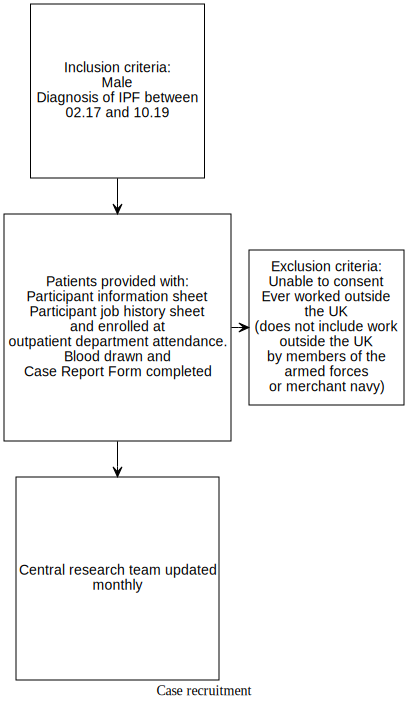

In [8]:
g1.subgraph(g2)
g1.edge('A', 'B')
# SVG(g1.render('img/g1'))

g1.subgraph(g3)
g1.edge('B', 'D')
SVG(g1.render('img/case_recruitment'))

In [9]:
g4 = add_edges(
    add_nodes(digraph(), [
        ('A', {'label': inclusion_criteria2}),
        ('B', {'label': clinic_selection}),
        ('C', {'label': clinic_selection2}),

    ]),
    [
      (('A', 'B'), {'label': ''}),  
      (('B', 'C'), {'label': ''}),  

      ]

)

g4 = apply_styles(g4, styles3)
g4.render('img/g4')
# SVG('img/g4.svg')

'img/g4.svg'

In [10]:
g5 = add_edges(
    add_nodes(digraph(), [
        ('D', {'label': recruitment_process}),
        ('E', {'label': exclusion_criteria2}),
    ]),
    [
       (('D', 'E'), {'label': ''}),  
      ]

)

g5 = apply_styles(g5, styles2)
g5.render('img/g5')
# SVG('img/g5.svg')

'img/g5.svg'

In [11]:
g6 = add_edges(
    add_nodes(digraph(), [
        ('F', {'label': monthly_update}),
      # ('B', {'label': 'Node B'}),
    ]),
    [
      # (('A', 'B'), {'label': 'Edge 1'}),  
      ]

)

g6 = apply_styles(g6, styles3)
g6.render('img/g6')
#SVG('img/g6.svg')

'img/g6.svg'

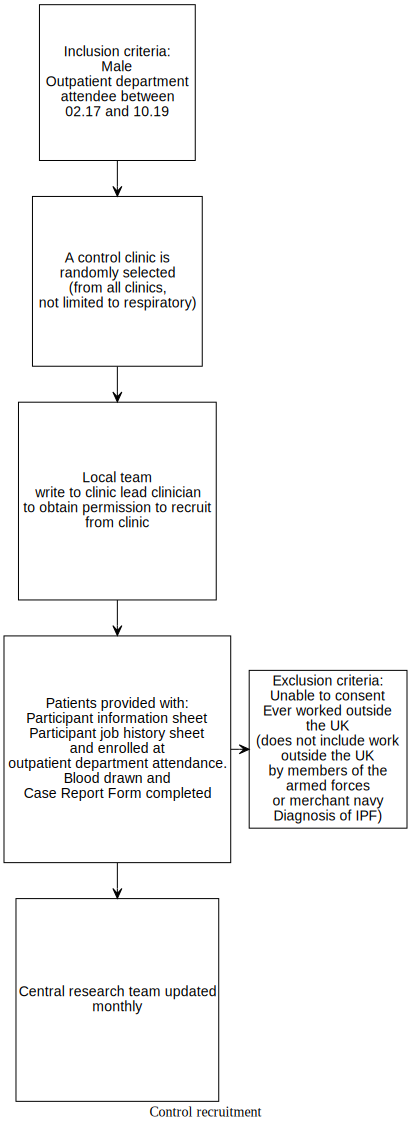

In [12]:
g4.subgraph(g5)
g4.edge('C', 'D')
#SVG(g4.render('img/g4'))

g4.subgraph(g6)
g4.edge('D', 'F')
SVG(g4.render('img/control_recruitement'))



In [13]:
g7 = add_edges(
    add_nodes(digraph(), [
        ('A', {'label': inclusion_criteria}),
        ('B', {'label': potential_cases}),
        ('C', {'label': potential_cases2}),
        ('D', {'label': exclusion_criteria}),
        ('E', {'label': '460 cases'}),
        ('F', {'label': measure}),
        ('G', {'label': 'Analysis'}),

    ]),
    [
      (('A', 'B'), {'label': ''}),  
      (('B', 'C'), {'label': ''}),  
      (('C', 'D'), {'label': ''}),  
      (('C', 'E'), {'label': ''}),  
      (('E', 'F'), {'label': ''}),  
      (('F', 'G'), {'label': ''}),  

      ]

)

g7 = apply_styles(g7, styles4)
g7.render('img/g7')
# SVG('img/g7.svg')

'img/g7.svg'

In [14]:
g8 = add_edges(
    add_nodes(digraph(), [
        ('H', {'label': inclusion_criteria2}),
        ('I', {'label': clinic_selection}),
        ('J', {'label': clinic_selection2}),
        ('K', {'label': exclusion_criteria2}),
        ('L', {'label': '460 controls'}),
      

    ]),
    [
      (('H', 'I'), {'label': ''}),  
      (('I', 'J'), {'label': ''}),  
      (('J', 'L'), {'label': ''}),  
      (('J', 'K'), {'label': ''}),  
      ]

)

g8 = apply_styles(g8, styles3)
g8.render('img/g8')
# SVG('img/g8.svg')

'img/g8.svg'

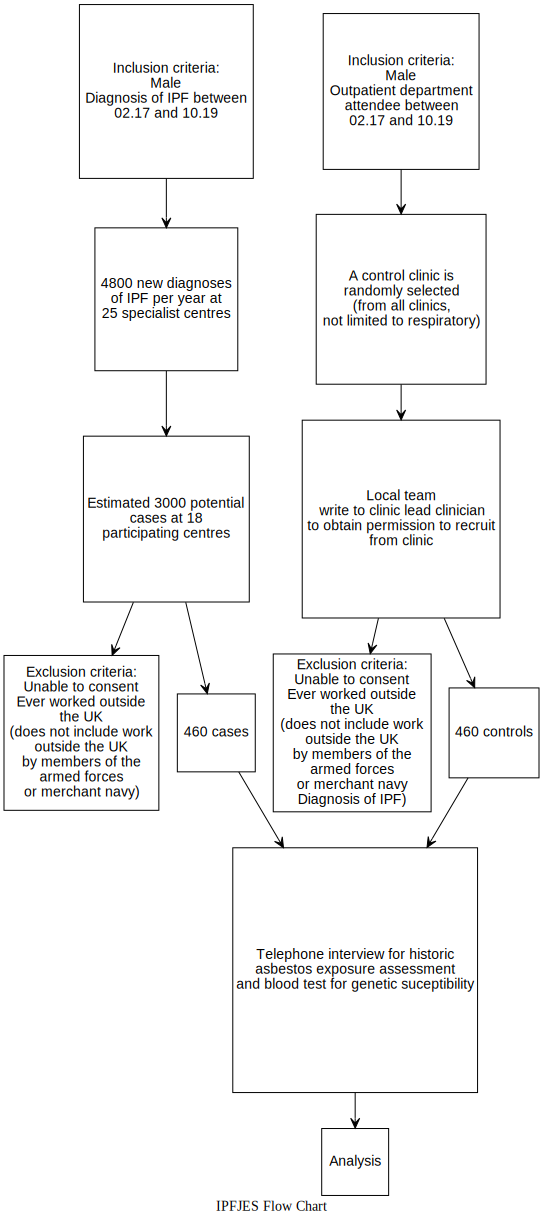

In [15]:
g7.subgraph(g8)
g7.edge('L', 'F')
SVG(g7.render('img/overview'))


